# Chapter 3. EDA w/ DuckDB

- https://learning.oreilly.com/library/view/duckdb-up-and/9781098159689/ch04.html

## LOAD DATA

In [5]:
# load the sql extension
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [6]:
# # start an in memory duckdb database
# %sql duckdb://

In [7]:
# %sql?

In [8]:
# start an saved duckdb database
%sql duckdb:////Users/vamsi_mbmax/Library/CloudStorage/OneDrive-Personal/01_vam_PROJECTS/LEARNING/proj_Databases/dev_proj_Databases/pract-duckDB/data/MyDB.ddb

Connecting to 'duckdb:////Users/vamsi_mbmax/Library/CloudStorage/OneDrive-Personal/01_vam_PROJECTS/LEARNING/proj_Databases/dev_proj_Databases/pract-duckDB/data/MyDB.ddb'

In [9]:
# # start an saved duckdb database
# %sql duckdb:///MyDB.ddb

## PERFORMING QUERIES

In [10]:
%sql SELECT * FROM "../data/airlines.csv"

Running query in 'duckdb:////Users/vamsi_mbmax/Library/CloudStorage/OneDrive-Personal/01_vam_PROJECTS/LEARNING/proj_Databases/dev_proj_Databases/pract-duckDB/data/MyDB.ddb'

IATA_CODE,AIRLINE
UA,United Air Lines Inc.
AA,American Airlines Inc.
US,US Airways Inc.
F9,Frontier Airlines Inc.
B6,JetBlue Airways
OO,Skywest Airlines Inc.
AS,Alaska Airlines Inc.
NK,Spirit Air Lines
WN,Southwest Airlines Co.
DL,Delta Air Lines Inc.


In [11]:
# alternatively use read_csv_auto

# %sql SELECT * FROM read_csv_auto("/Users/vamsi_mbmax/Library/CloudStorage/OneDrive-Personal/01_vam_PROJECTS/LEARNING/proj_Databases/dev_proj_Databases/pract-duckDB/data/airlines.csv", header=true)

In [12]:
result = %sql SELECT * FROM "../data/airlines.csv"
df = result.DataFrame()

df

Running query in 'duckdb:////Users/vamsi_mbmax/Library/CloudStorage/OneDrive-Personal/01_vam_PROJECTS/LEARNING/proj_Databases/dev_proj_Databases/pract-duckDB/data/MyDB.ddb'

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [13]:
# display all rows by default
%config SqlMagic.displaylimit = None

displaylimit: Value None will be treated as 0 (no limit)

In [14]:
%%sql
CREATE TABLE airlines
AS
FROM "../data/airlines.csv"

Running query in 'duckdb:////Users/vamsi_mbmax/Library/CloudStorage/OneDrive-Personal/01_vam_PROJECTS/LEARNING/proj_Databases/dev_proj_Databases/pract-duckDB/data/MyDB.ddb'

RuntimeError: (duckdb.duckdb.CatalogException) Catalog Error: Table with name "airlines" already exists!
[SQL: CREATE TABLE airlines
AS
FROM "../data/airlines.csv"]
(Background on this error at: https://sqlalche.me/e/20/f405)
If you need help solving this issue, send us a message: https://ploomber.io/community


In [ ]:
%sql SELECT * FROM airlines

Running query in 'duckdb:////Users/vamsi_mbmax/Library/CloudStorage/OneDrive-Personal/01_vam_PROJECTS/LEARNING/proj_Databases/dev_proj_Databases/pract-duckDB/data/MyDB.ddb'

IATA_CODE,AIRLINE
UA,United Air Lines Inc.
AA,American Airlines Inc.
US,US Airways Inc.
F9,Frontier Airlines Inc.
B6,JetBlue Airways
OO,Skywest Airlines Inc.
AS,Alaska Airlines Inc.
NK,Spirit Air Lines
WN,Southwest Airlines Co.
DL,Delta Air Lines Inc.


In [ ]:
# check tables in the database
%sqlcmd tables

Name
airlines


In [ ]:
# check columns of a table
%sqlcmd columns -t airlines

name,type,nullable,default,autoincrement,comment
IATA_CODE,VARCHAR,True,None,False,None
AIRLINE,VARCHAR,True,None,False,None


In [ ]:
%sqlcmd profile -t airlines

,IATA_CODE,AIRLINE
count,14,14
unique,14,14
top,WN,Skywest Airlines Inc.
freq,1,1
min,nan,nan
max,nan,nan


In [ ]:
%%sql --save state_count

SELECT
count(*) as Count, STATE
FROM "../data/airports.csv"
GROUP BY STATE
ORDER BY Count DESC
LIMIT 10;

Running query in 'duckdb:////Users/vamsi_mbmax/Library/CloudStorage/OneDrive-Personal/01_vam_PROJECTS/LEARNING/proj_Databases/dev_proj_Databases/pract-duckDB/data/MyDB.ddb'

Count,STATE
24,TX
22,CA
19,AK
17,FL
15,MI
14,NY
10,CO
8,ND
8,MT
8,MN


In [ ]:
%sql SELECT * FROM state_count

Generating CTE with stored snippets: 'state_count'

Running query in 'duckdb:////Users/vamsi_mbmax/Library/CloudStorage/OneDrive-Personal/01_vam_PROJECTS/LEARNING/proj_Databases/dev_proj_Databases/pract-duckDB/data/MyDB.ddb'

Count,STATE
24,TX
22,CA
19,AK
17,FL
15,MI
14,NY
10,CO
8,PA
8,NC
8,WI


In [ ]:
%%sql --save state_count --no-execute

SELECT
count(*) as Count, STATE
FROM "../data/airports.csv"
GROUP BY STATE
ORDER BY Count

Running query in 'duckdb:////Users/vamsi_mbmax/Library/CloudStorage/OneDrive-Personal/01_vam_PROJECTS/LEARNING/proj_Databases/dev_proj_Databases/pract-duckDB/data/MyDB.ddb'

Skipping execution...

In [ ]:
%sql SELECT * FROM state_count

Generating CTE with stored snippets: 'state_count'

Running query in 'duckdb:////Users/vamsi_mbmax/Library/CloudStorage/OneDrive-Personal/01_vam_PROJECTS/LEARNING/proj_Databases/dev_proj_Databases/pract-duckDB/data/MyDB.ddb'

Count,STATE
1,CT
1,VT
1,RI
1,GU
1,DE
1,MD
1,WV
1,AS
1,NH
2,VI


## VISUALIZATION

- create and save query `airports_A`

In [18]:
%%sql --save airports_A --no-execute
SELECT
*
FROM '../data/airports.csv'
WHERE state LIKE 'A%'

Running query in 'duckdb:////Users/vamsi_mbmax/Library/CloudStorage/OneDrive-Personal/01_vam_PROJECTS/LEARNING/proj_Databases/dev_proj_Databases/pract-duckDB/data/MyDB.ddb'

Skipping execution...

<Axes: title={'center': "'STATE' from 'airports_A'"}, xlabel='STATE', ylabel='Count'>

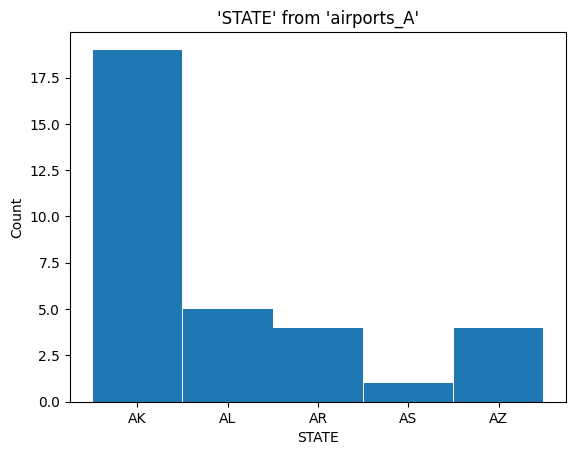

In [19]:
%sqlplot histogram --table airports_A --column STATE

In [23]:
%%sql --save boston
SELECT
*
FROM '../data/boston.csv'

Running query in 'duckdb:////Users/vamsi_mbmax/Library/CloudStorage/OneDrive-Personal/01_vam_PROJECTS/LEARNING/proj_Databases/dev_proj_Databases/pract-duckDB/data/MyDB.ddb'

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,NA,36.2
0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
0.08829,12.5,7.87,NA,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9
0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1
0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5
0.17004,12.5,7.87,NA,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9


<Axes: title={'center': "Histogram from 'boston'"}, ylabel='Count'>

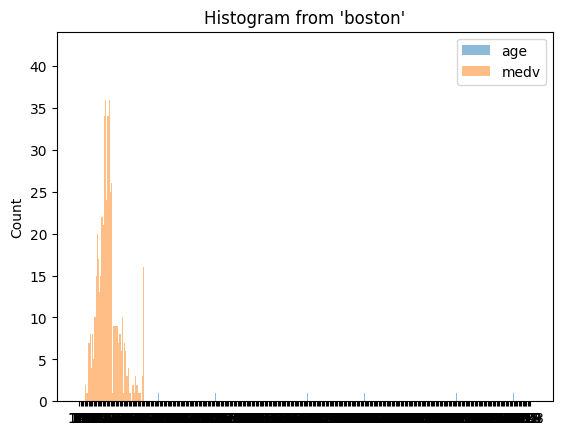

In [24]:
%sqlplot histogram --column age medv --table boston

In [25]:
%%sql --save airports_by_state
SELECT count(*) as Count, STATE
FROM '../data/airports.csv'
GROUP BY STATE
ORDER BY Count DESC
LIMIT 5

Running query in 'duckdb:////Users/vamsi_mbmax/Library/CloudStorage/OneDrive-Personal/01_vam_PROJECTS/LEARNING/proj_Databases/dev_proj_Databases/pract-duckDB/data/MyDB.ddb'

Count,STATE
24,TX
22,CA
19,AK
17,FL
15,MI


Removing NULLs, if there exists any from STATE and Count

<Axes: title={'center': 'airports_by_state'}>

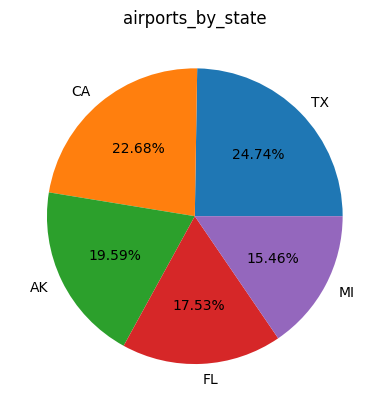

In [28]:
%sqlplot pie --table airports_by_state --column STATE Count --show-numbers

Removing NULLs, if there exists any from STATE and Count

<Axes: title={'center': 'airports_by_state'}, xlabel='STATE', ylabel='Count'>

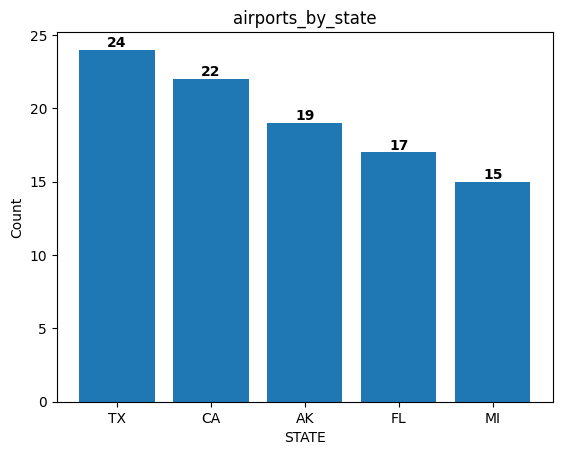

In [29]:
%sqlplot bar --table airports_by_state --column STATE Count --show-numbers

Removing NULLs, if there exists any from STATE and Count

Text(0.5, 0, 'State')

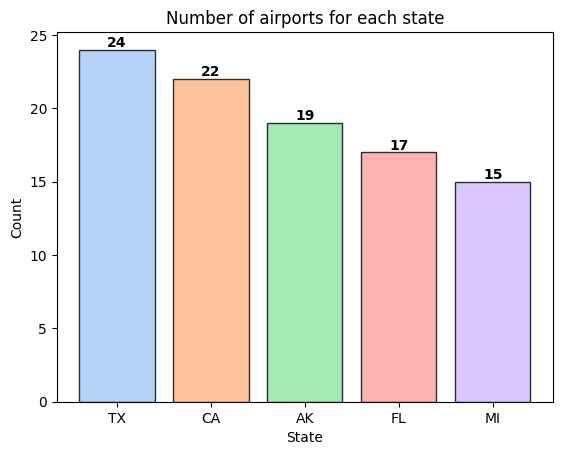

In [31]:
ax = %sqlplot bar --table airports_by_state --column STATE Count --show-numbers

import seaborn

palette_color = seaborn.color_palette("pastel")

# iterate through each bar
for i, bar in enumerate(ax.patches):
    bar.set_alpha(0.8)
    bar.set_color(palette_color[i])
    bar.set_edgecolor("black")

ax.set_title("Number of airports for each state")
ax.set_xlabel("State")

In [36]:
%%sql --save titanic_age_groups
SELECT
    AgeGroup,
    SUM(CASE WHEN Survived = 1 THEN 1 ELSE 0 END) AS SurvivedCount,
    SUM(CASE WHEN Survived = 0 THEN 1 ELSE 0 END) AS NotSurvivedCount
FROM (
    SELECT
        CASE
            WHEN Age >= 0 AND Age < 10 THEN '0-9'
            WHEN Age >= 10 AND Age < 20 THEN '10-19'
            WHEN Age >= 20 AND Age < 30 THEN '20-29'
            WHEN Age >= 30 AND Age < 40 THEN '30-39'
            WHEN Age >= 40 AND Age < 50 THEN '40-49'
            WHEN Age >= 50 AND Age < 60 THEN '50-59'
            ELSE '60+' -- Assuming age 60 and above
        END AS AgeGroup,
        Survived
  FROM '../data/titanic.csv'
) AS AgeGroups
GROUP BY AgeGroup
ORDER BY AgeGroup;


Running query in 'duckdb:////Users/vamsi_mbmax/Library/CloudStorage/OneDrive-Personal/01_vam_PROJECTS/LEARNING/proj_Databases/dev_proj_Databases/pract-duckDB/data/MyDB.ddb'

AgeGroup,SurvivedCount,NotSurvivedCount
0-9,9,11
10-19,19,22
20-29,43,81
30-39,26,39
40-49,14,32
50-59,9,13
60+,32,68


## INTEGRATING WITH MYSQL

In [7]:
from getpass import getpass

# password = getpass()
username = "root"  # ideally give the username eg: user1
host = "localhost"
port = "3306"
db = "My_DB"  # ideally give this when creating a database

# construct a connection string

connection_string = f"mysql://{username}@{host}:{port}"  # jdbc:mysql://localhost:3306 # this is taken from my_sql_workbench
# connection_string = f"mysql://{username}:{password}@{host}:{port}/{db}"

connection_string

'mysql://root@localhost:3306'

In [8]:
# assign the connection string to the environment variable
from os import environ

environ["MYSQL_DATABASE_URL"] = connection_string

In [9]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [10]:
%sql --connections

current,url,alias
